<a href="https://colab.research.google.com/github/JhenyC/Final_proyect_SIST_G5/blob/main/final_proyect_sistemas_inteligentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [224]:
print("hola")
print("probando respositorio")

hola
probando respositorio


In [225]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

In [226]:
import pandas as pd
df = pd.read_csv('/content/heart_disease_health_indicators_BRFSS2015.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

<Axes: >

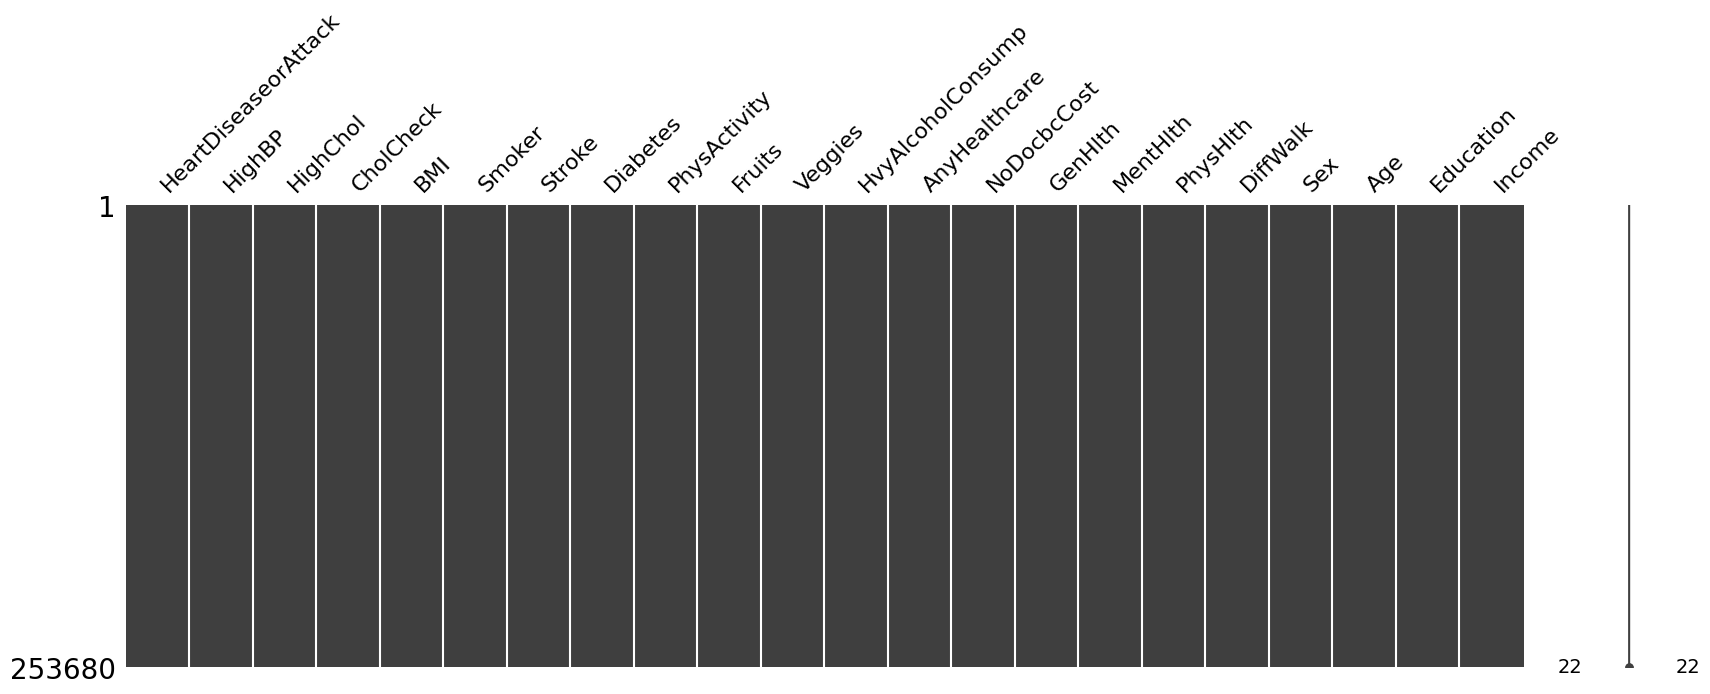

In [227]:
import missingno as msno

msno.matrix(df, figsize = (20, 6))

In [228]:
#tamaño de dataset 
print(df.shape)
#cantidad de valores nulos en cada columna de datframe 
df.isnull().sum()

(253680, 22)


HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [229]:
df.head(8)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0


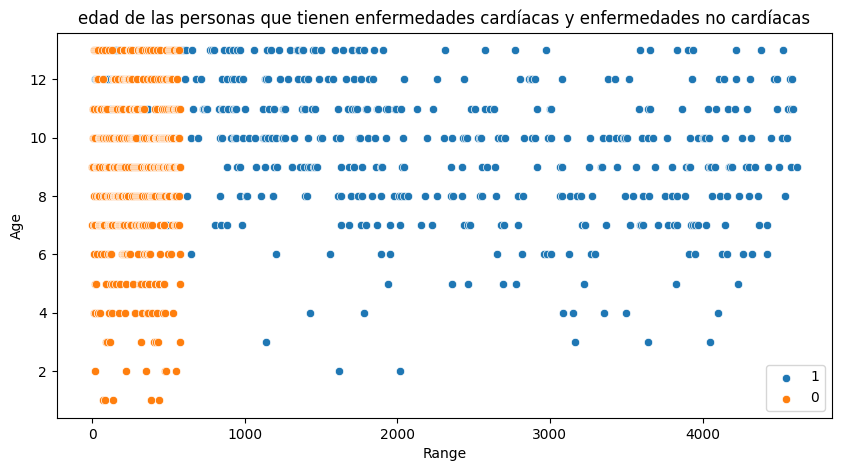

In [230]:
plt.figure(figsize=(10,5))

data0=df[df['HeartDiseaseorAttack']==0.0]

data1=df[df['HeartDiseaseorAttack']==1.0]

sns.scatterplot(data1['Age'].head(500),label="1")
sns.scatterplot(data0['Age'].head(500),label="0")

plt.title("edad de las personas que tienen enfermedades cardíacas y enfermedades no cardíacas")

plt.ylabel("Age")

plt.xlabel("Range")
plt.show()

In [231]:
df.describe()
df.groupby('HeartDiseaseorAttack').size()

HeartDiseaseorAttack
0.0    229787
1.0     23893
dtype: int64

PREPROCESAMIENTO

In [232]:
#TOTAL DE COLUMNAS 
print(df.columns)
print("no. of column = ", len(df.columns))

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')
no. of column =  22


In [233]:
df.drop([ 'Education', 'Income'], axis=1)

no_disease = len(df[df['HeartDiseaseorAttack'] == 1])
non_disease = df[df.HeartDiseaseorAttack == 0].index
random_indices = np.random.choice(non_disease,no_disease, replace=False)
disease_indices = df[df.HeartDiseaseorAttack == 1].index
under_sample_indices = np.concatenate([disease_indices,random_indices])
new_data= df.loc[under_sample_indices]

In [234]:
new_data

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,2.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
20,1.0,1.0,1.0,1.0,22.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,30.0,0.0,1.0,0.0,12.0,4.0,4.0
26,1.0,1.0,1.0,1.0,37.0,1.0,1.0,2.0,0.0,0.0,...,1.0,0.0,5.0,0.0,0.0,1.0,1.0,10.0,6.0,5.0
27,1.0,1.0,1.0,1.0,28.0,1.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,1.0,12.0,2.0,4.0
47,1.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,1.0,0.0,0.0,1.0,10.0,4.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201957,0.0,0.0,0.0,1.0,30.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,10.0,6.0,5.0
90286,0.0,0.0,0.0,1.0,19.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,2.0,15.0,0.0,0.0,0.0,5.0,6.0,6.0
2881,0.0,1.0,1.0,1.0,24.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,0.0,7.0,1.0,1.0,9.0,6.0,3.0
112956,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,6.0,6.0,8.0


In [235]:
new_data.describe()
new_data.groupby('HeartDiseaseorAttack').size()

HeartDiseaseorAttack
0.0    23893
1.0    23893
dtype: int64

In [236]:
#NEW_VARIABLES DEPENDEIENTES E INDEPENDEIENTES
x=new_data.drop(['HeartDiseaseorAttack', 'Education', 'Income'], axis=1) #eliminar estas columnas
y=new_data['HeartDiseaseorAttack'] #variable objetivo

In [237]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)
y_train.value_counts()


0.0    19127
1.0    19101
Name: HeartDiseaseorAttack, dtype: int64

MODELO de REGRESION LOGISTICA

In [238]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Crear el modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(x_train, y_train)
# Predeciendo las etiquetas para los datos de prueba
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
# Calcular la precisión del modelo de entrenamiento y prueba
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Precisión en datos de entrenamiento:", train_accuracy)
print("Precisión en datos de prueba:", test_accuracy)

Precisión en datos de entrenamiento: 0.7656168253636079
Precisión en datos de prueba: 0.7672107135383972


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [239]:
#OBTENIENDO PROBABILIDADES DE PREDICIION PARA LOS DATOS DE PRUEBA
y_test_prob = model.predict_proba(x_test)[:, 1]

In [240]:
#EVALUANDO MODELO CON SKILEARN
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.7603976465814567
Recall: 0.7821368948247078
F1-score: 0.7711140829132804


PROBANDO MODELOS DE CLASIFICACION

In [241]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
#MODELOS A IMPLEMENTAR
models={
    'DT':DecisionTreeClassifier(),
    'NB':GaussianNB(),
    'XGC':XGBClassifier(),
    'RF':RandomForestClassifier()
    
}

Using DT:
Training Accuracy: 0.9813487496076174
Testing Accuracy: 0.6741996233521658


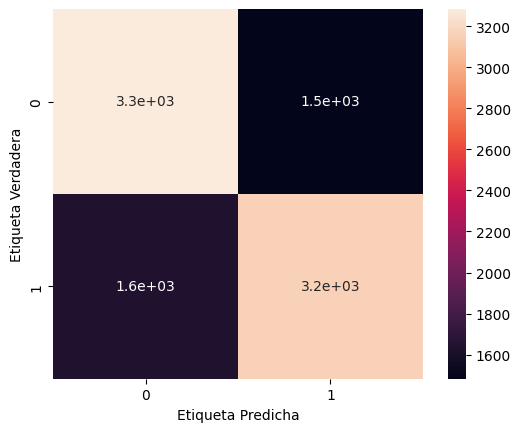

Recall: 0.6596410684474123
Precision: 0.6806632213608957
F1-score: 0.6699872827469265
Fbeta-score: 0.6763522766175967
Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.69      0.68      4766
         1.0       0.68      0.66      0.67      4792

    accuracy                           0.67      9558
   macro avg       0.67      0.67      0.67      9558
weighted avg       0.67      0.67      0.67      9558

---------------------------------
Using NB:
Training Accuracy: 0.7312964319347075
Testing Accuracy: 0.7249424565808746


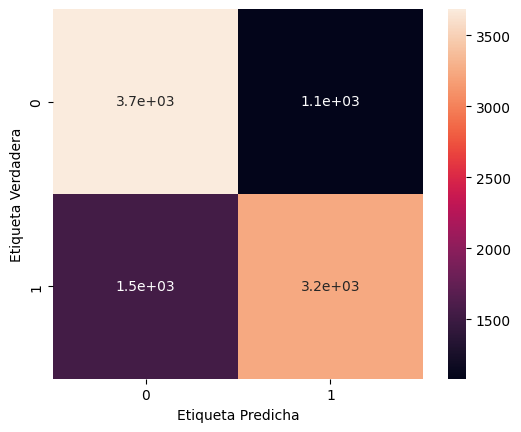

Recall: 0.6769616026711185
Precision: 0.750057803468208
F1-score: 0.7116376000877481
Fbeta-score: 0.7342024262176352
Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.77      0.74      4766
         1.0       0.75      0.68      0.71      4792

    accuracy                           0.72      9558
   macro avg       0.73      0.73      0.72      9558
weighted avg       0.73      0.72      0.72      9558

---------------------------------
Using XGC:
Training Accuracy: 0.8077325520560845
Testing Accuracy: 0.7659552207574807


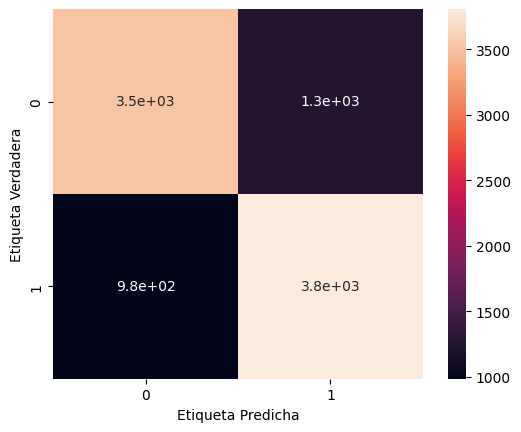

Recall: 0.794449081803005
Precision: 0.7525202609211307
F1-score: 0.772916455182215
Fbeta-score: 0.7605481860316446
Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.74      0.76      4766
         1.0       0.75      0.79      0.77      4792

    accuracy                           0.77      9558
   macro avg       0.77      0.77      0.77      9558
weighted avg       0.77      0.77      0.77      9558

---------------------------------
Using RF:
Training Accuracy: 0.9813487496076174
Testing Accuracy: 0.7522494245658088


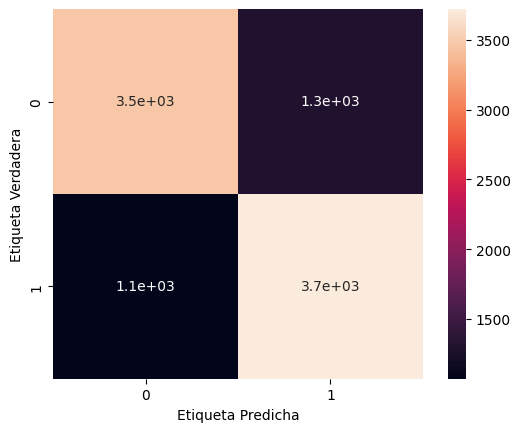

Recall: 0.7762938230383973
Precision: 0.7416267942583732
F1-score: 0.7585644371941271
Fbeta-score: 0.748310267138719
Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.73      0.75      4766
         1.0       0.74      0.78      0.76      4792

    accuracy                           0.75      9558
   macro avg       0.75      0.75      0.75      9558
weighted avg       0.75      0.75      0.75      9558

---------------------------------
Best Model: XGC
Best Accuracy: 0.7659552207574807


In [242]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import classification_report

best_model = None
best_accuracy = 0

for name, model in models.items():
    print(f'Using {name}:')
    
    # Entrenar el modelo
    model.fit(x_train, y_train)
    
    # Realizar predicciones en los datos de prueba
    y_pred = model.predict(x_test)
    
    # Calcular y mostrar la precisión en los datos de entrenamiento y prueba
    train_accuracy = accuracy_score(y_train, model.predict(x_train))
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f'Training Accuracy: {train_accuracy}')
    print(f'Testing Accuracy: {test_accuracy}')
    
    # Verificar si el modelo actual es el mejor hasta ahora
    if test_accuracy > best_accuracy:
        best_model = name
        best_accuracy = test_accuracy
        y_predecir=y_pred
    
    # Mostrar la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    # Crear un mapa de calor de la matriz de confusión
    sns.heatmap(cm, annot=True, square=True);
    
    # Agregar etiquetas a los ejes x e y
    plt.xlabel('Etiqueta Predicha')
    plt.ylabel('Etiqueta Verdadera')

    # Mostrar el gráfico
    plt.show()
    
    # Calcular y mostrar recall, precisión, F1-score y Fbeta-score
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    fbeta = fbeta_score(y_test, y_pred, beta=0.5)
    print(f'Recall: {recall}')
    print(f'Precision: {precision}')
    print(f'F1-score: {f1}')
    print(f'Fbeta-score: {fbeta}')
    
    # Mostrar el informe de clasificación
    classification = classification_report(y_test, y_pred)
    print(f'Classification Report:\n{classification}')
    
    print('-' * 33)

# Mostrar el nombre del mejor modelo y su accuracy
print(f'Best Model: {best_model}')
print(f'Best Accuracy: {best_accuracy}')


TRABAJNDO CON MODELOS DE REGRESION 

In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def plot_metrics(regression_type, y_test, y_pred):
    plt.scatter(y_test, y_pred)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
    plt.title(regression_type + ' - Actual vs. Predicted')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid(True)
    plt.show()

def print_metrics(regression_type, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"{regression_type} Metrics:")
    print(f"MSE: {mse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R2: {r2:.2f}")
    print(f"RMSE: {rmse:.2f}\n")
    return mse, mae, r2, rmse

def train_models(X_train, X_test, y_train, y_test):
    best_model = None
    best_model_name = ""
    best_mse = float('inf')
    polinomial_transformer = None

    # Regresión Polinomial
    poly_features = PolynomialFeatures(degree=2)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    polinomial_regression = LinearRegression()
    polinomial_regression.fit(X_train_poly, y_train)
    y_pred_poly = polinomial_regression.predict(X_test_poly)

    mse, mae, r2, rmse = print_metrics("Polinomial Regression", y_test, y_pred_poly)
    if mse < best_mse:
        best_mse = mse
        best_model = polinomial_regression
        polinomial_transformer = poly_features
        best_model_name = "Polinomial Regression"
    
    plot_metrics("Polinomial Regression", y_test, y_pred_poly)

    # Regresión Ridge
    ridge = Ridge(alpha=0.05)
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_test)

    mse, mae, r2, rmse = print_metrics("Ridge Regression", y_test, y_pred_ridge)
    if mse < best_mse:
        best_mse = mse
        best_model = ridge
        best_model_name = "Ridge Regression"
    
    plot_metrics("Ridge Regression", y_test, y_pred_ridge)

    # Regresión Lasso
    lasso = Lasso(alpha=0.05)
    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)

    mse, mae, r2, rmse = print_metrics("Lasso Regression", y_test, y_pred_lasso)
    if mse < best_mse:
        best_mse = mse
        best_model = lasso
        best_model_name = "Lasso Regression"
    
    plot_metrics("Lasso Regression", y_test, y_pred_lasso)

    return [best_model, polinomial_transformer, best_model_name]



Polinomial Regression Metrics:
MSE: 0.16
MAE: 0.32
R2: 0.37
RMSE: 0.40



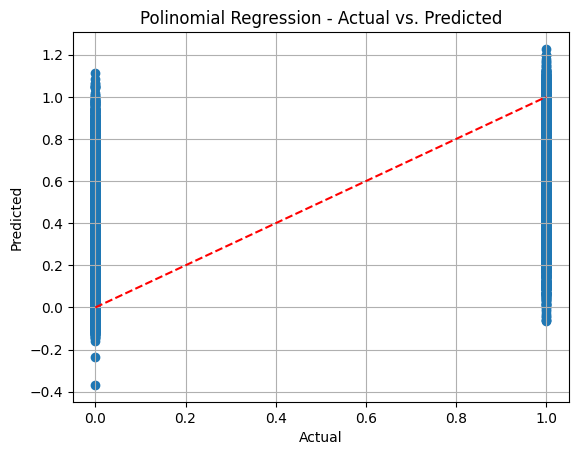

Ridge Regression Metrics:
MSE: 0.16
MAE: 0.34
R2: 0.35
RMSE: 0.40



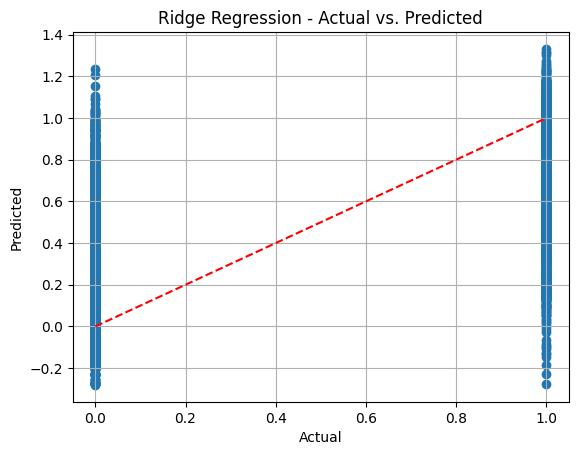

Lasso Regression Metrics:
MSE: 0.18
MAE: 0.38
R2: 0.27
RMSE: 0.43



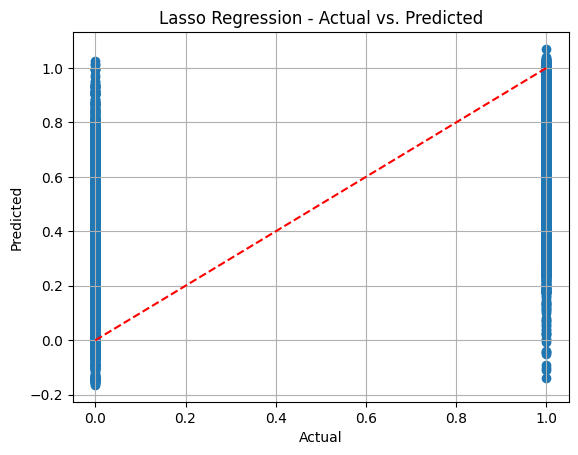

In [244]:
  # Obtener mejor modelo de regresión
  best_model, polinomial_transformer, best_model_name = train_models(x_train, x_test, y_train, y_test)


APLICANDO UNA RED NEURONAL 

In [245]:
print(len(x2_train))
print(len(x2_test))

38228
9558


In [246]:
#para modelos de regresion
x2_train, x2_test, y2_train, y2_test = train_test_split(x,y,test_size = 0.2, random_state = 0)
y2_train.value_counts()

0.0    19127
1.0    19101
Name: HeartDiseaseorAttack, dtype: int64

In [247]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
# Crear un modelo secuencial
model = Sequential()
# Capa de entrada y primera capa oculta
model.add(Dense(64, activation='relu', input_dim=19))
# Capa de dropout para prevenir el sobreajuste
model.add(Dropout(0.20))
# Segunda capa oculta
model.add(Dense(64, activation='relu'))
# Capa de dropout adicional
model.add(Dropout(0.40))
# Capa de salida
model.add(Dense(1, activation='sigmoid'))
# Resumen de la arquitectura del modelo
model.summary()
# Compilación del modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 64)                1280      
                                                                 
 dropout_22 (Dropout)        (None, 64)                0         
                                                                 
 dense_34 (Dense)            (None, 64)                4160      
                                                                 
 dropout_23 (Dropout)        (None, 64)                0         
                                                                 
 dense_35 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,505
Trainable params: 5,505
Non-trainable params: 0
_________________________________________________________________


In [248]:
h = model.fit(x2_train, y2_train, epochs = 32, validation_split = 0.2 )


Epoch 1/32
956/956 [==============================] - 4s 3ms/step - loss: 0.6793 - accuracy: 0.6651 - val_loss: 0.5298 - val_accuracy: 0.7433
Epoch 2/32
956/956 [==============================] - 2s 3ms/step - loss: 0.5340 - accuracy: 0.7414 - val_loss: 0.5168 - val_accuracy: 0.7523
Epoch 3/32
956/956 [==============================] - 3s 3ms/step - loss: 0.5175 - accuracy: 0.7511 - val_loss: 0.5036 - val_accuracy: 0.7510
Epoch 4/32
956/956 [==============================] - 3s 4ms/step - loss: 0.5088 - accuracy: 0.7573 - val_loss: 0.5130 - val_accuracy: 0.7509
Epoch 5/32
956/956 [==============================] - 3s 3ms/step - loss: 0.5050 - accuracy: 0.7603 - val_loss: 0.5014 - val_accuracy: 0.7569
Epoch 6/32
956/956 [==============================] - 2s 3ms/step - loss: 0.5030 - accuracy: 0.7607 - val_loss: 0.4963 - val_accuracy: 0.7552
Epoch 7/32
956/956 [==============================] - 3s 3ms/step - loss: 0.5003 - accuracy: 0.7634 - val_loss: 0.4963 - val_accuracy: 0.7586
Epoch 

In [249]:
def plot_loss(h):
    
    plt.plot(h.history['loss'], label='train')
    plt.plot(h.history['val_loss'], label='validation')
    plt.title('Training loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

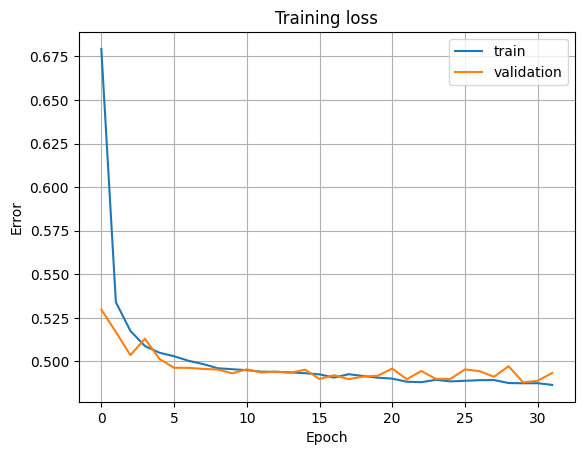

In [250]:
plot_loss(h)

In [251]:
def plot_accuracy(h):
    # Se traza la precisión del entrenamiento y la precisión de validación en función de las épocas
    plt.plot(h.history['accuracy'], label='train')
    plt.plot(h.history['val_accuracy'], label='validation')
    plt.title('Training accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)


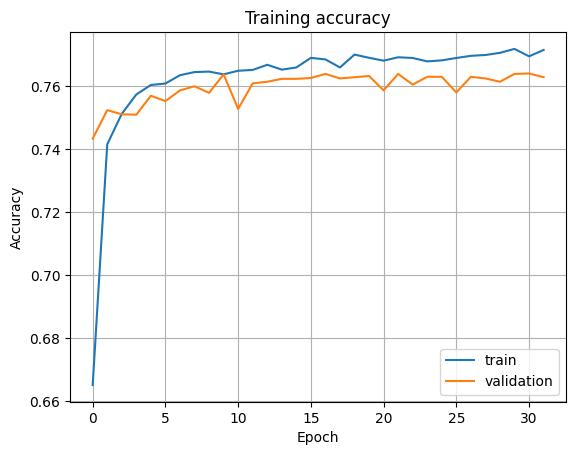

In [252]:
plot_accuracy(h)

299/299 [==============================] - 1s 2ms/step


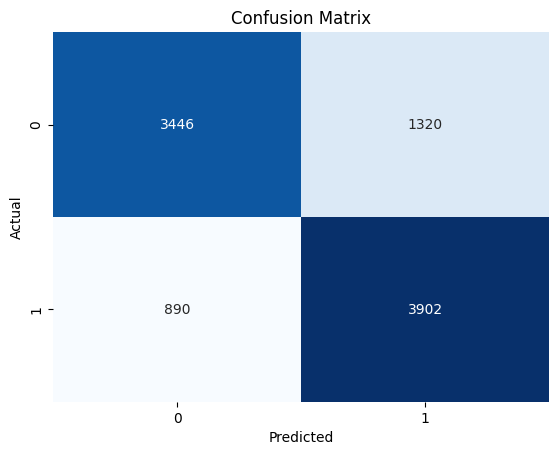

Accuracy:  0.7687800795145427
Sensitivity:  0.7230381871590432
Specificity:  0.8142737896494157


In [253]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

# Predecir los resultados del conjunto de prueba
y2_pred = model.predict(x2_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y2_test, y2_pred.round())

# Graficar la matriz de confusión utilizando un mapa de calor
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calcular la precisión (accuracy) del modelo
accuracy = accuracy_score(y2_test, y2_pred.round())

# Calcular la sensibilidad y especificidad del modelo
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# Mostrar las métricas de evaluación del modelo
print('Accuracy: ', accuracy)
print('Sensitivity: ', sensitivity)
print('Specificity: ', specificity)
